In [5]:
# ! conda install -y matplotlib

# matplotlib 입문

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

In [7]:
# 데이터 준비
import seaborn as sns
df_iris = sns.load_dataset("iris") 

In [8]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1. 단순 방식 (plt.xxx 함수 사용)

#### 산점도

In [10]:
# 산점도 x좌표를 위한 시리즈
xs = df_iris['sepal_length']

# 산점도 y좌표를 위한 시리즈
ys = df_iris['sepal_width']

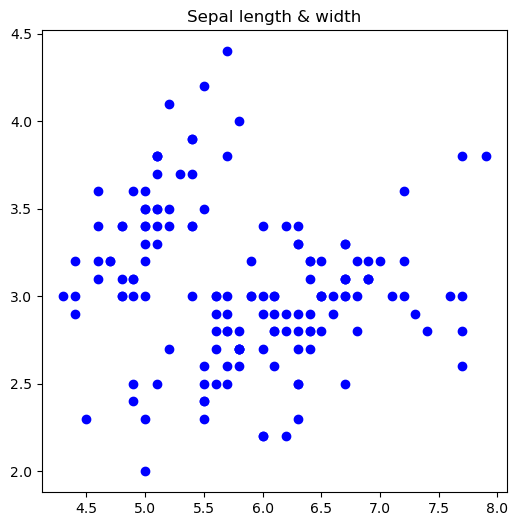

In [22]:
# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (6, 6)

plt.title('Sepal length & width')
# 산점도 그리기
plt.scatter(xs, ys, c='Blue')

# 화면에 출력
plt.show()

#### 함수의 그래프

In [24]:
# 데이터 준비

# 시그모이드 함수 정의
def sigmoid(x, a):
    return 1/(1 + np.exp(-a*x))

In [25]:
# 그래프 x좌표를 위한 리스트
xp = np.linspace(-3, 3, 61)
xp

array([-3. , -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. ,
       -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9,
       -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,
        0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,
        1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,
        2.5,  2.6,  2.7,  2.8,  2.9,  3. ])

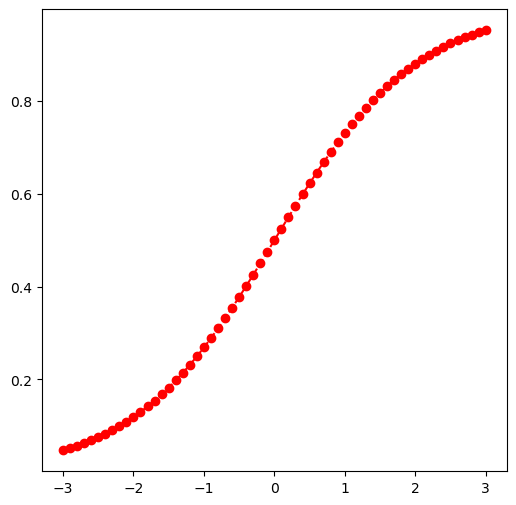

In [27]:
# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (6, 6)
# plt.figure(figsize=(6,6))

# 그래프 그리기
plt.plot(xp, sigmoid(xp, 1.0), 'ro--')

# 화면에 출력
plt.show()

#### 복잡한 예

In [30]:
# 한글폰트
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

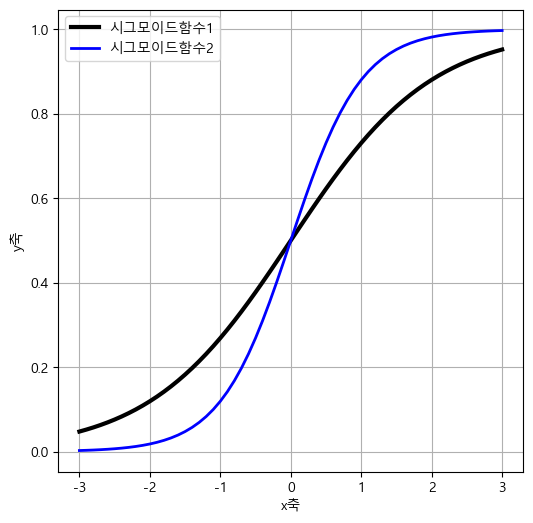

In [31]:
# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (6, 6)

# 레이블이 달린 그래프 그리기 #1
plt.plot(xp, sigmoid(xp, 1.0), 
         label='시그모이드함수1', lw=3, c='k')

# 레이블이 달린 그래프 그리기 #2
plt.plot(xp, sigmoid(xp, 2.0), 
         label='시그모이드함수2', lw=2, c='b')

# 눈금 그리기
plt.grid()

# 범례 그리기
plt.legend()

# 축 표시
plt.xlabel('x축')
plt.ylabel('y축')

# 화면 출력
plt.show()

### 3차 함수 `f(x) = (x-2) x (x+2)` 그리기

In [32]:
def f(x):
    return (x - 2) * x * (x + 2)

In [33]:
print(f(1))

-3


In [34]:
print(f(np.array([1,2,3])))

[-3  0 15]


샘플 x 데이터 생성

In [35]:
x = np.arange(-3, 3.5, 0.5)
print(x)

[-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]


In [36]:
x = np.linspace(-3, 3, 10)
print(np.round(x,2))

[-3.   -2.33 -1.67 -1.   -0.33  0.33  1.    1.67  2.33  3.  ]


In [37]:
y = f(x)

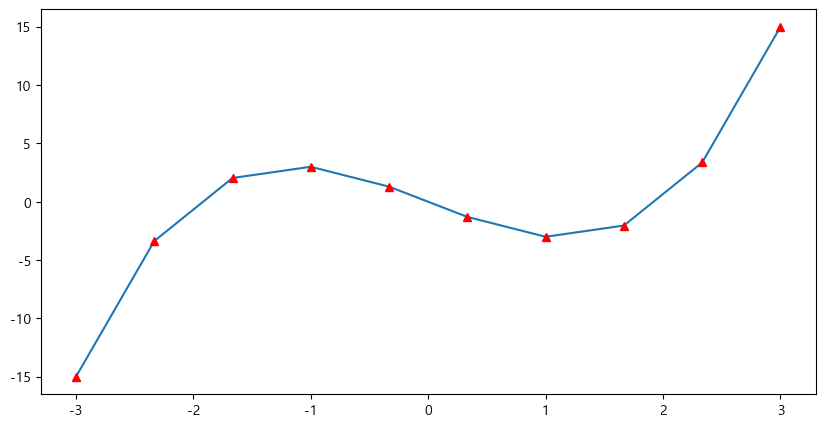

In [48]:
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.plot(x, y, 'r^')
plt.show()

## 2. fig, ax 변수를 사용하는 방식

#### 시계열 그래프 그리기

In [43]:
# 데이터 준비

# 아이스크림 지출액
df_ice = pd.read_excel('https://github.com/flourscent\
/sample-data/blob/master/data/ice-sales.xlsx?raw=true', 
    sheet_name=0)

In [45]:
# 결과 확인
df_ice.head()

,연월,지출
0,2015-01-01,401
1,2015-02-01,345
2,2015-03-01,480
3,2015-04-01,590
4,2015-05-01,928


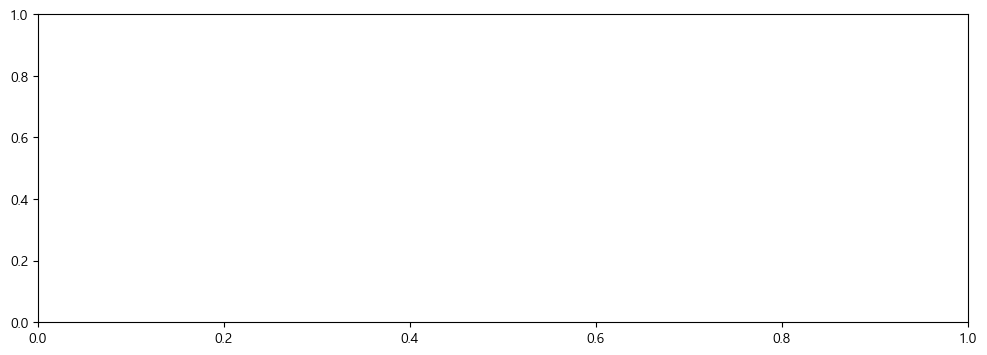

In [49]:
# ax 변수를 구하기
# 그래프 크기 설정도 겸한다
fig, ax = plt.subplots(figsize=(12, 4))

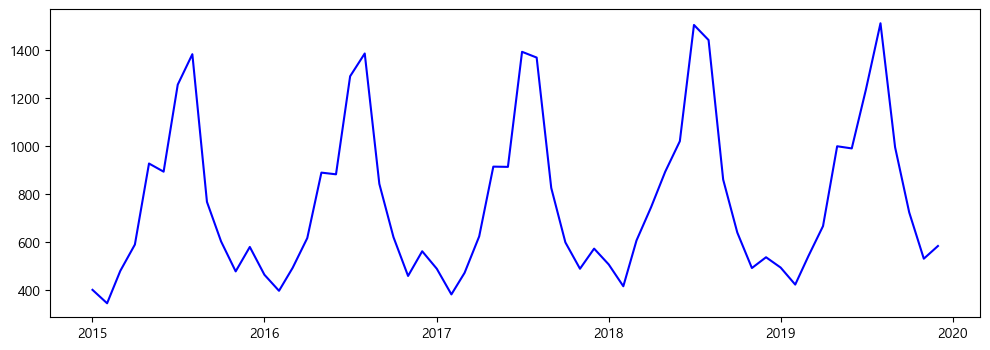

In [51]:
# ax 변수를 구하기
# 그래프 크기 설정도 겸한다
fig, ax = plt.subplots(figsize=(12, 4))

# 그래프 그리기
ax.plot(df_ice['연월'], df_ice['지출'], c='b')
plt.show()

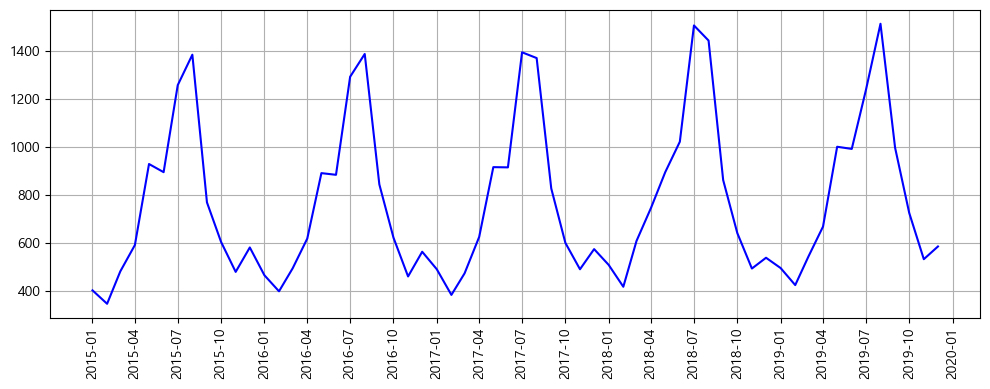

In [52]:
# ax 변수를 구하기
# 그래프 크기 설정도 겸한다
fig, ax = plt.subplots(figsize=(12, 4))

# 그래프 그리기
ax.plot(df_ice['연월'], df_ice['지출'], c='b')

# 날짜 설정용 라이브러리
import matplotlib.dates as mdates

# 눈금 간격을 3개월로 설정
days = mdates.MonthLocator(bymonth=range(1,13,3))
ax.xaxis.set_major_locator(days)

# x축의 레이블을 90도 회전
ax.tick_params(axis='x', rotation=90)

# 눈금 표시
ax.grid()

# 화면 출력
plt.show()

## 3. ax 변수를 사용하는 방식 2 (그래프 영역을 여러 개 만드는 경우)

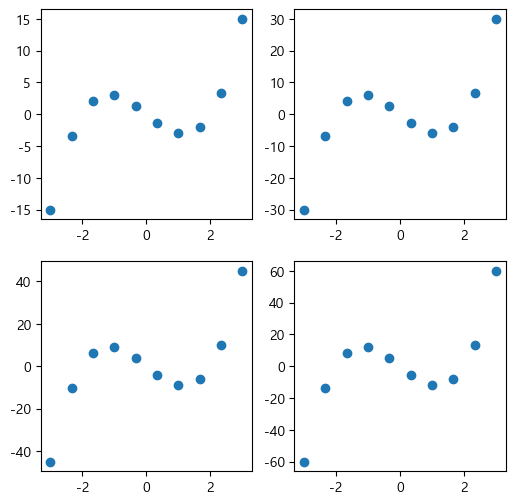

In [58]:
fig = plt.figure()

axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)


axes1.plot(x, y, 'o')
axes2.plot(x, y*2, 'o')
axes3.plot(x, y*3, 'o')
axes4.plot(x, y*4, 'o')

plt.show()

#### 여러 개의 그래프 영역에 그래프 그리기

In [56]:
! conda install scikit-learn -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\anaconda3\envs\Python_basic

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-1.1.1               |  py310haa95532_0         387 KB
    pooch-1.4.0                |     pyhd3eb1b0_0          41 KB
    scikit-learn-1.2.1         |  py310hd77b12b_0         6.6 MB
    scipy-1.10.0               |  py310hb9afe5d_1        18.8 MB
    ------------------------------------------------------------
                                           Total:        25.7 MB

The following NEW packages will be INSTALLED:

  appdirs            pkgs/main/noarch::appdirs-1.4.4-pyhd3eb1b0_0 None
  icc_rt             pkgs/main/win-64::icc_rt-2022.1.0-h6049295_2 None
  joblib             pkgs/main/win-64::joblib-1.1.1-py310haa95532_0 None
  pooch              pkgs/main/noarch::p



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [57]:
# 데이터 준비

# 손글씨 데이터
# 시간이 오래 걸릴 수 있으니 주의
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1,)

# 이미지 데이터
image = mnist.data.values
# 정답 데이터
label = mnist.target

C:\anaconda3\envs\Python_basic\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(

KeyboardInterrupt



In [ ]:
# 그래프 크기 설정
plt.figure(figsize=(10, 3))

# 이미지 20장을 출력
for i in range(20): 
    
    # i번째 ax 변수를 얻음
    ax = plt.subplot(2, 10, i+1)
    
    # i번째 이미지 데이터를 28x28 크기로 변환
    img = image[i].reshape(28,28)
    
    # img를 이미지로 그림
    ax.imshow(img, cmap='gray_r')
    
    # 정답 데이터를 타이틀로 표시
    ax.set_title(label[i])
    
    # x, y 눈금 표시하지 않음
    ax.set_xticks([])
    ax.set_yticks([])
    
# 인접 오브젝트와 부딪히지 않게 함
plt.tight_layout()

# 화면 출력
plt.show() 

## 4. 데이터프레임을 이용하는 방식

#### 데이터프레임으로 히스토그램 그리기

In [ ]:
# 히스토그램 그리기

# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (8, 8)

# 히스토그램 그리기
df_iris.hist()

# 화면 출력
plt.show()

#### 시리즈를 사용한 막대그래프 그리기

In [ ]:
# 데이터 준비

# df_iris['sepal_width']의 값마다 건수를 집계하고 상위 5가지를 뽑음
counts_ser = df_iris['sepal_width'].value_counts().iloc[:5]

# 결과 확인
print(counts_ser)

In [ ]:
# value_counts 함수의 실행 결과로 막대그래프 그리기

# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (4, 4)

# 시리즈 데이터를 사용해 막대그래프 그리기
counts_ser.plot(kind='bar')

# 화면 출력
plt.show()

### plot Kind

여러 형식별 플로팅 메서드를 제공하고 또는 [DataFrame.plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) 에 메서드 명과 같은 **`kind`** 매개변수에 플롯 종류를 지정할 수 있다. 

- [line](#plot) : line plot (default)
- ‘bar’ or ‘barh’ for bar plots
- ‘barh’ : horizontal bar plot
- ‘hist’ for histogram
- [box](#boxplot): for boxplot
- ‘kde’ or ‘density’ for density plots
- ‘density’ : same as ‘kde’
- ‘area’ for area plots
- ‘pie’ for pie plots
- ‘scatter’ for scatter plots
- ‘hexbin’ for hexagonal bin plots

# 한글 사용

- 사용가능한 폰트 확인, TTF 폰트 설치 방법
- matplotlib 텍스트 출력시 폰트 특성을 지정 (FontProperties)
- matplotlib 전역으로 한글 글꼴 지정(rcParams)

### 폰트 찾기

In [61]:
# 폰트 목록에서 폰트 찾기
for font in fm.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

NanumSquare C:\Windows\Fonts\NanumSquareEB.ttf
NanumGothic C:\Windows\Fonts\NanumGothic.ttf
NanumSquare C:\Windows\Fonts\NanumSquareL.ttf
NanumMyeongjo C:\Windows\Fonts\NanumMyeongjoExtraBold.ttf
NanumMyeongjo C:\WINDOWS\Fonts\NanumMyeongjo.ttf
NanumGothic C:\WINDOWS\Fonts\NanumGothic.ttf
NanumSquare C:\Windows\Fonts\NanumSquareB.ttf
NanumSquare C:\WINDOWS\Fonts\NanumSquareEB.ttf
NanumMyeongjo C:\WINDOWS\Fonts\NanumMyeongjoExtraBold.ttf
NanumMyeongjo C:\Windows\Fonts\NanumMyeongjoBold.ttf
NanumGothic C:\Windows\Fonts\NanumGothicBold.ttf
NanumGothic C:\WINDOWS\Fonts\NanumGothicLight.ttf
NanumSquare C:\WINDOWS\Fonts\NanumSquareR.ttf
NanumMyeongjo C:\WINDOWS\Fonts\NanumMyeongjoBold.ttf
NanumGothic C:\WINDOWS\Fonts\NanumGothicBold.ttf
NanumMyeongjo C:\Windows\Fonts\NanumMyeongjo.ttf
NanumGothic C:\WINDOWS\Fonts\NanumGothicExtraBold.ttf
NanumSquare C:\WINDOWS\Fonts\NanumSquareL.ttf
NanumSquare C:\WINDOWS\Fonts\NanumSquareB.ttf
NanumGothic C:\Windows\Fonts\NanumGothicExtraBold.ttf
NanumSquar

### rcPrams 사용 전역

Text(0.5, 1.0, '한글 타이틀...')

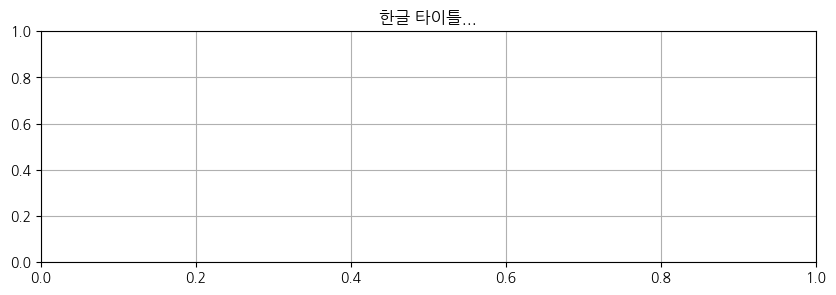

In [63]:
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
# font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontname = fm.FontProperties(fname=font_path, size=18).get_name()  # 폰트 패밀리 이름!
plt.rcParams["font.family"] = fontname

plt.rcParams['axes.unicode_minus'] = False # 한글 사용

# matplotlib 설정
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (10,3)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

plt.title('한글 타이틀...')

### 그래프에 FontProperties 객체 사용

한글 표현을 사용하는 그래프에서만 사용한다.

```python
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
fp = fm.FontProperties(fname=path, size=18)

prices = np.random.randn(100).cumsum()

plt.plot(prices, '-')
plt.title('가격추이', fontproperties=fp)
plt.xlabel('일자', fontproperties=fp)
plt.ylabel('가격', fontproperties=fp)
```

